In [8]:
import os
import numpy as np
import pandas as pd

import pymatgen as pg


In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [10]:

def local_min(df):

    df['dy'] = df['Edis'].diff()

    df['sign_dy'] = np.sign(df['dy'])
    df['sign_change'] = df['sign_dy'].diff()

    # Indices of local maxima: derivative goes from negative (-1) to positive (+1)
    local_min_indices = df.index[(df['sign_change'] > 0)]

    local_mins = df.loc[local_min_indices, ['cell_length', 'Edis']].reset_index(drop=True)

    return local_mins

def local_max(df):
    df['dy'] = df['Edis'].diff()

    df['sign_dy'] = np.sign(df['dy'])
    df['sign_change'] = df['sign_dy'].diff()

    # Indices of local maxima: derivative goes from negative (-1) to positive (+1)
    local_min_indices = df.index[(df['sign_change'] < 0)]

    local_max = df.loc[local_min_indices, ['cell_length', 'Edis']].reset_index(drop=True)

    return local_max

In [11]:
def finding_diff(df):
    abs_max = df['Edis'].iloc[-1]
    max_val = local_max(df)
    min_val = local_min(df)

    diff = (abs_max + max_val['Edis'][0])/2 - min_val['Edis'][0]

    return diff

In [12]:
from pymatgen.core import Structure

In [13]:
#list all folders inside li_d3s
li_d3s = os.listdir("d3_calcs")

results = []

df = pd.DataFrame()
cnt=0
for items in li_d3s:
    cnt+=1
    #get the path of each folder
    path = os.path.join("d3_calcs", items)
    # print(items)
    
    #ignore .DS_Store
    if items == ".DS_Store":
        continue
    file = os.path.join(path, f'{items}.csv')
    struct_file = os.path.join(path, 'POSCAR')
    df = pd.read_csv(file)
    print(f"Reading {file}")

    struct = Structure.from_file(struct_file)
    sites = struct.num_sites

    # print(struct.composition['Li'])
    li_sites = struct.composition['Mg']
    counter_ion_sites = struct.composition[struct.composition.elements[1]]
   
    diff_energy = finding_diff(df)
    print(f'Composition {struct.composition}')
    print(f'diff per toal sites {diff_energy/sites}')
    print(f'diff per cation sites {diff_energy/li_sites}')
    print('-----------------------------------')

    result = {
        "Symbol": struct.composition.elements[0] if struct.composition.elements[0].symbol != 'Mg' else struct.composition.elements[1],
        "Structure": struct.composition,
        "Total Sites": sites,
        "Cation Sites": li_sites,
        "Counter Ion Sites": counter_ion_sites,
        "Diff Energy": diff_energy,
        "Diff per Total Sites": diff_energy/sites,
        "Diff per Cation Sites": diff_energy/li_sites,
        "Diff per Counter Ion Sites": diff_energy/counter_ion_sites,
        "Composition": str(struct.composition)
    }

    results.append(result)
print(f'total structure analysed = {cnt}')
    

Reading d3_calcs/Mg3C_1016240/Mg3C_1016240.csv
Composition Mg3 C1
diff per toal sites 0.005713171067310762
diff per cation sites 0.0076175614230810165
-----------------------------------
Reading d3_calcs/Mg2C3_28793/Mg2C3_28793.csv
Composition Mg4 C6
diff per toal sites 0.0026591523363758496
diff per cation sites 0.0066478808409396245
-----------------------------------
Reading d3_calcs/Mg3C_1185780/Mg3C_1185780.csv
Composition Mg6 C2
diff per toal sites 0.006051249023368425
diff per cation sites 0.0080683320311579
-----------------------------------
Reading d3_calcs/Mg7C_1016272/Mg7C_1016272.csv
Composition Mg7 C1
diff per toal sites 0.006976527615250787
diff per cation sites 0.00797317441742947
-----------------------------------
Reading d3_calcs/MgC_1185851/MgC_1185851.csv
Composition Mg1 C1
diff per toal sites 0.0019486213779506003
diff per cation sites 0.0038972427559012006
-----------------------------------
Reading d3_calcs/Mg15C_1023497/Mg15C_1023497.csv
Composition Mg15 C1
dif

### for individual elements

In [15]:
results_df = pd.DataFrame(results)
results_df.to_csv("analysis_results.csv", index=False)

print(f"Total structures analysed = {cnt}")
# print("Results saved to analysis_results.csv")

results_df

Total structures analysed = 7


,Symbol,Structure,Total Sites,Cation Sites,Counter Ion Sites,Diff Energy,Diff per Total Sites,Diff per Cation Sites,Diff per Counter Ion Sites,Composition
0,C,"(Mg, C)",4,3.0,1.0,0.022853,0.005713,0.007618,0.022853,Mg3 C1
1,C,"(Mg, C)",10,4.0,6.0,0.026592,0.002659,0.006648,0.004432,Mg4 C6
2,C,"(Mg, C)",8,6.0,2.0,0.048410,0.006051,0.008068,0.024205,Mg6 C2
3,C,"(Mg, C)",8,7.0,1.0,0.055812,0.006977,0.007973,0.055812,Mg7 C1
4,C,"(Mg, C)",2,1.0,1.0,0.003897,0.001949,0.003897,0.003897,Mg1 C1
5,C,"(Mg, C)",16,15.0,1.0,0.164746,0.010297,0.010983,0.164746,Mg15 C1
6,C,"(Mg, C)",6,2.0,4.0,NaN,NaN,NaN,NaN,Mg2 C4


### Thougest part is to make the Feature functions data 


In [16]:
props = pd.read_csv('../mixed_comps/PubChemElements_all.csv')
polarisability = pd.read_csv('../elements_polarizability.csv')

props = props[['Symbol', 'AtomicMass','AtomicRadius','Electronegativity','IonizationEnergy','ElectronAffinity']]

In [17]:
all_props = []
cnt = 0
for items in li_d3s:
    # cnt+=1
    #get the path of each folder
    path = os.path.join("d3_calcs", items)
    # print(items)
    
    #ignore .DS_Store
    if items == ".DS_Store":
        continue
    file = os.path.join(path, f'{items}.csv')
    struct_file = os.path.join(path, 'POSCAR')


    struct = Structure.from_file(struct_file)
    sites = struct.num_sites

    vol_site = struct.volume/sites
    # print(density)

    # print(struct.composition.elements[1])

    elem = struct.composition.elements[0] if(struct.composition.elements[1].symbol == 'Mg')  else struct.composition.elements[1]

    print(elem)
    # print(elem.symbol == 'Ge')

    matched_row = props[props['Symbol'] == elem.symbol]
    elem_polarizability = polarisability[polarisability['Symbol'] == elem.symbol]

    space_group = struct.get_space_group_info()


    
    print(struct.composition.reduced_formula)
    # DiffPerLi = results_df[results_df['Symbol'] == elem.symbol]
    # matched_row.add('Polarizability', elem_polarizability['Polarizability'].values[0])
    matched_row['Polarizability'] = elem_polarizability['Polarizability'].values[0]
    matched_row['results_per_total'] = results_df['Diff per Total Sites'][cnt]*1000
    matched_row['results_per_cation'] = results_df['Diff per Cation Sites'][cnt]*1000
    # matched_row['TotalSites'] = results_df['Total Sites'][cnt]
    matched_row['CationSites'] = results_df['Cation Sites'][cnt]/sites
    matched_row['CounterIonSites'] = results_df['Counter Ion Sites'][cnt]/sites
    matched_row['results_per_counter_ion'] = results_df['Diff per Counter Ion Sites'][cnt]
    # matched_row['Diff per Li Sites'] = DiffPerLi['Diff per Li Sites'].values[0]
    matched_row['res_per_volm_per_site'] = results_df['Diff per Total Sites'][cnt]/vol_site
    matched_row['Result']=  results_df['Diff per Total Sites'][cnt]/vol_site*1000
    matched_row['SpaceGroup'] = space_group[0]
    matched_row['SpaceGroupNumber'] = space_group[1]
    matched_row['Total Sites'] = sites

    matched_row["Reduced Formula"] = struct.composition.reduced_formula
    all_props.append(matched_row)

    cnt+=1

all_props_df = pd.concat(all_props, ignore_index=True)
    

C
Mg3C
C
Mg2C3
C
Mg3C
C
Mg7C
C
MgC
C
Mg15C
C
MgC2


/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_92657/1917154705.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_row['Polarizability'] = elem_polarizability['Polarizability'].values[0]
/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_92657/1917154705.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_row['results_per_total'] = results_df['Diff per Total Sites'][cnt]*1000
/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_92657/1917154705.py:41: SettingWith

In [18]:
all_props_df


,Symbol,AtomicMass,AtomicRadius,Electronegativity,IonizationEnergy,ElectronAffinity,Polarizability,results_per_total,results_per_cation,CationSites,CounterIonSites,results_per_counter_ion,res_per_volm_per_site,Result,SpaceGroup,SpaceGroupNumber,Total Sites,Reduced Formula
0,C,12.011,170.0,2.55,11.26,1.263,11.3,5.713171,7.617561,0.750000,0.250000,0.022853,0.000303,0.303097,P4mm,99,4,Mg3C
1,C,12.011,170.0,2.55,11.26,1.263,11.3,2.659152,6.647881,0.400000,0.600000,0.004432,0.000208,0.208266,Pnnm,58,10,Mg2C3
2,C,12.011,170.0,2.55,11.26,1.263,11.3,6.051249,8.068332,0.750000,0.250000,0.024205,0.000302,0.301518,P6_3/mmc,194,8,Mg3C
3,C,12.011,170.0,2.55,11.26,1.263,11.3,6.976528,7.973174,0.875000,0.125000,0.055812,0.000355,0.355100,P-6m2,187,8,Mg7C
4,C,12.011,170.0,2.55,11.26,1.263,11.3,1.948621,3.897243,0.500000,0.500000,0.003897,0.000177,0.176782,Pm-3m,221,2,MgC
5,C,12.011,170.0,2.55,11.26,1.263,11.3,10.296602,10.983042,0.937500,0.062500,0.164746,0.000482,0.481841,P-6m2,187,16,Mg15C
6,C,12.011,170.0,2.55,11.26,1.263,11.3,NaN,NaN,0.333333,0.666667,NaN,NaN,NaN,P4_2/mnm,136,6,MgC2


In [19]:
all_props_df.to_csv('all_props_new.csv', index=False)

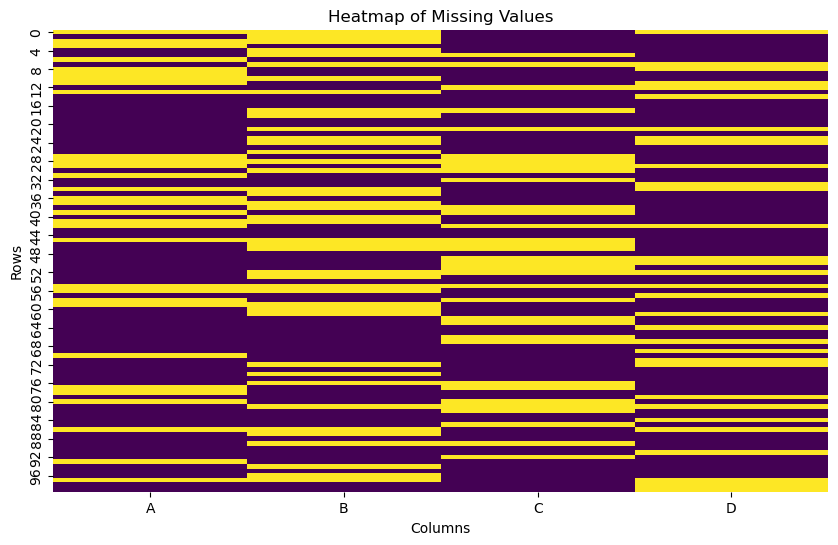

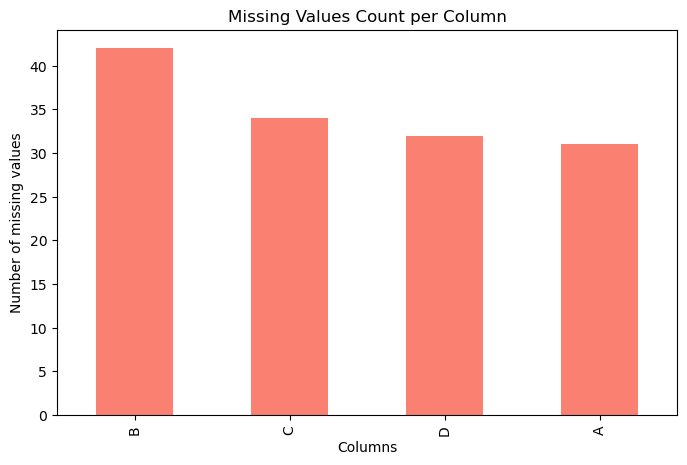

In [20]:
# show me some graphs to analyze NaN values

import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame with NaN values (replace this with your actual DataFrame)
# For demonstration, we're creating a DataFrame with some random missing values.
np.random.seed(42)
data = {
    'A': np.random.choice([1, 2, np.nan], size=100),
    'B': np.random.choice([3, 4, np.nan], size=100),
    'C': np.random.choice([5, 6, np.nan], size=100),
    'D': np.random.choice([7, 8, np.nan], size=100)
}
df = pd.DataFrame(data)

# -------------------------------
# Plot 1: Heatmap of Missing Values
# -------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

# -------------------------------
# Plot 2: Bar Chart of Missing Values per Column
# -------------------------------
missing_counts = df.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
missing_counts.plot(kind="bar", color='salmon')
plt.ylabel("Number of missing values")
plt.xlabel("Columns")
plt.title("Missing Values Count per Column")
plt.show()

In [21]:
all_props_df.fillna(0, inplace=True)


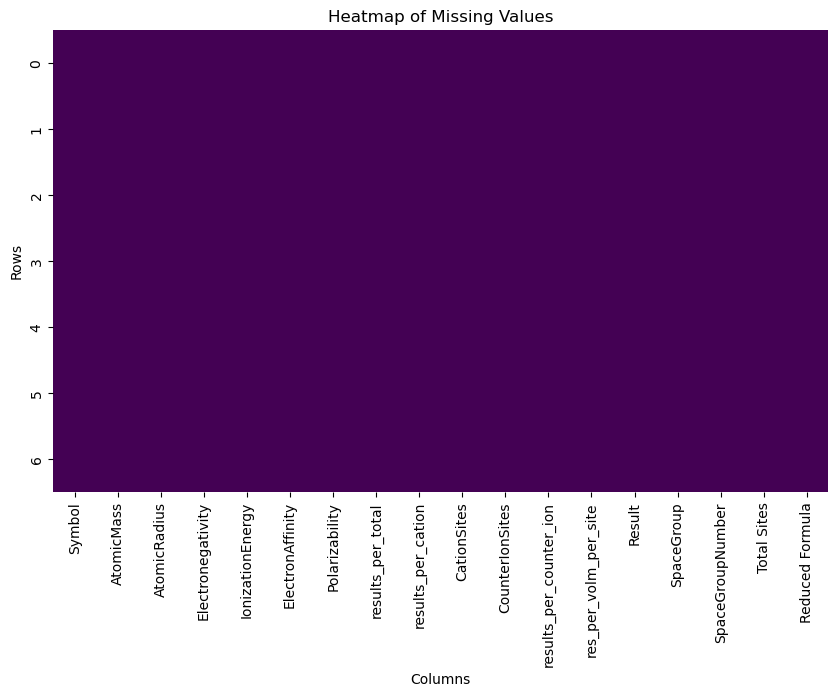

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(all_props_df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [23]:
# all_props_df.to_csv('all_props_new.csv', index=False)
all_props_df = pd.read_csv('all_props.csv')

all_props_df

FileNotFoundError: [Errno 2] No such file or directory: 'all_props.csv'